In [102]:
'''
This is code for extracting NN features of face image data 
and then fit a linear model to predict attractiveness of a face
Available dataset: TWIN, CHICAGO and MIT
Available NN feature: 'caffeNet','vgg16','vggFace' and 'faceSNN'

BY Linjie Li
Please run this code on guru2 server
'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import linear_model
%matplotlib inline
import os
import random
from os import listdir
from os.path import isfile, join

feaNum = [[120,120,150],[40,40,200],[40,70,120], [20,50,20]]
dataInd = [1,2]
modelInd = 2
Dataset = ['twin','chicago','mit']
TrainDataset = Dataset[dataInd[0]]
TestDataset = Dataset[dataInd[1]]
NNs = ['caffeNet','vgg16','vggFace','faceSNN']
MODEL = NNs[modelInd]
savePath = '../Result/'+TestDataset+'/'+MODEL
TrainFeaPath ='../Result/'+TrainDataset+'/'+MODEL+ '/feature_pca_atrr.csv'
TestFeaPath = savePath + '/feature_pca_atrr.csv'

if not os.path.exists(savePath):
    os.makedirs(savePath)

TrainFea = pd.read_csv(TrainFeaPath,header=None).as_matrix()
TestFea = pd.read_csv(TestFeaPath,header=None).as_matrix()
# print TrainFea.shape
# print TestFea.shape
#numF = feaNum[modelInd][dataInd[0]]
numF = min(TrainFea.shape[1],TestFea.shape[1],feaNum[modelInd][dataInd[0]])
print numF

70


In [103]:
train_ratingPath = '../Result/'+TrainDataset+'/meanRating.csv'
train_mean_rating = pd.read_csv(train_ratingPath,index_col = 0).as_matrix()[:,0].tolist()
train_mean_rating = map(float, train_mean_rating)
train_mean_rating = np.array(train_mean_rating)

test_ratingPath = '../Result/'+TestDataset+'/meanRating.csv'
test_mean_rating = pd.read_csv(test_ratingPath,index_col = 0).as_matrix()[:,0].tolist()
test_mean_rating = map(float, test_mean_rating)
test_mean_rating = np.array(test_mean_rating)

print 'On the training dataset: '+TrainDataset
baseLine = train_mean_rating.mean()
print 'train mean rating: ', baseLine

# cross validation 
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(\
                       TrainFea, train_mean_rating, test_size=0.2, random_state=0)

X_train_hat = X_train[:,:numF]
X_test_hat = X_test[:,:numF]
# Do linear regression on feature_arr and mean_rating
regr = linear_model.Ridge(fit_intercept=True)
# mu = sum(y_train)*1.0/len(y_train)
# sigma = np.std(y_train)
# y_train_whiten = (y_train - mu)/sigma
regr.fit(X_train_hat, y_train)
predicted_rating = regr.predict(X_test_hat)
#predicted_rating = predicted_rating*sigma +mu
# Calculate the mean square error
MSE = np.mean((predicted_rating - y_test) ** 2)

# Returns the coefficient of determination R^2 of the prediction.
variance_score = regr.score(X_test_hat, y_test)

# Calculate the correlation between prediction and actual rating.
cor = np.corrcoef(predicted_rating, y_test)

print 'Correlation: ', cor[0,1]
print 'R^2 score: ',variance_score
print 'num of features: ',numF
print 'MSE: ',MSE

print ''
print 'On the testing dataset: '+TestDataset
test_baseLine = test_mean_rating.mean()
print 'test mean rating: ', test_baseLine
# mu = sum(test_mean_rating)*1.0/len(test_mean_rating)
# sigma = np.std(test_mean_rating)
TestFea_hat = TestFea[:,:numF]
predicted_rating = regr.predict(TestFea_hat)
#predicted_rating = predicted_rating*sigma +mu
# Calculate the mean square error
MSE = np.mean((predicted_rating - test_mean_rating) ** 2)

# Returns the coefficient of determination R^2 of the prediction.
variance_score = regr.score(TestFea_hat, test_mean_rating)

# Calculate the correlation between prediction and actual rating.
cor = np.corrcoef(predicted_rating, test_mean_rating)
print 'Correlation: ', cor[0,1]
print 'R^2 score: ',variance_score
print 'num of features: ',numF
print 'MSE: ',MSE

On the training dataset: chicago
train mean rating:  3.23186626992
Correlation:  0.521864192056
R^2 score:  0.239792453432
num of features:  70
MSE:  0.448919565004

On the testing dataset: mit
test mean rating:  4.938305509
Correlation:  -0.21103480096
R^2 score:  -2.38794590327
num of features:  70
MSE:  4.90878242335


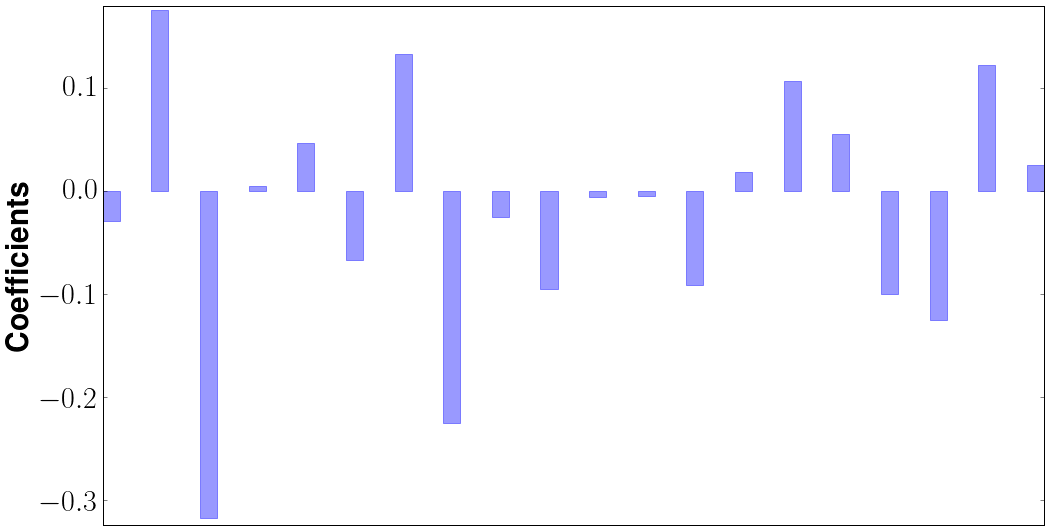

[-0.02944334  0.17523554 -0.31782897  0.00477873  0.04665512 -0.06731115
  0.13239687 -0.22521471 -0.02573333 -0.09569966]


In [90]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
def barPlotMulti(Data,yStr,figName):
    Data = np.asarray(Data)
    fig = plt.figure()
    a=fig.add_subplot(1,1,1)
    barLoc = np.arange(len(Data))

    opacity = 0.4
    width = 0.35
    plt.bar(barLoc, Data,width = width,edgecolor='b',color = 'b',alpha=opacity)
    stickFont = 20
    minRange = min(Data)*1.02
    maxRange = max(Data)*1.02
    fig.set_size_inches(15, 7.5)
    axes = plt.gca()
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
    plt.axis('tight')
    plt.ylabel(r'\textbf{'+yStr+'}',fontsize = 30)
   
    plt.tick_params(axis='y', labelsize=30)
    params = {'legend.fontsize': 30}
    plt.rcParams.update(params)
    fig.subplots_adjust(left=0.25,top = 0.85)
    fig = plt.gcf()
    axes = plt.gca()
    axes.set_ylim([minRange,maxRange])
    fig.savefig(figName+'.jpg', dpi=100)
    plt.tight_layout()
    plt.show()
    return    
savePath = '../Result/'+TrainDataset+'/'+MODEL
barPlotMulti(regr.coef_, r'Coefficients',savePath+'LR_coefficient')
print regr.coef_[:10]